In [69]:
# Imporing required libraries for project

import pandas as pd # for data manipluation
import numpy as np  # for data calculations and statistical measurement
import matplotlib.pyplot as plt #for ineractive visualization charts
import seaborn as sns #for ineractive visualization charts
%matplotlib inline 
import warnings  # For warnings
warnings.filterwarnings("ignore") # To ignore unwanted warnings


import statsmodels.api as sm # for applying stats model to do forecasting
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization


from sklearn.model_selection import train_test_split #to split data in train test
from sklearn.metrics import accuracy_score, log_loss # to give accuracy score and loss 
from sklearn.neighbors import KNeighborsClassifier # model
from sklearn.svm import SVC, LinearSVC # model
from sklearn.tree import DecisionTreeClassifier #model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier # model
from sklearn.naive_bayes import GaussianNB # model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis # model

In [2]:
# Reading Dataset and loading into variable
df = pd.read_csv('Customertravel.csv')

In [3]:
# showing first five rows from dataset
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
#showing information of data like its integer or object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
# Checking for null values
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [19]:
#showing 5 point summary
df.describe()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,32.109015,0.662474,1.262055,2.437107,0.377358,0.396226,0.234801
std,3.337388,0.907770,0.726132,1.606233,0.484980,0.489369,0.424097
min,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
max,38.000000,2.000000,2.000000,6.000000,1.000000,1.000000,1.000000


### there is no null values in dataset so no need to perform data handling.

In [6]:
#checking maximum age
df['Age'].max()

38

In [7]:
#checking highest number of service opted by individual 
df['ServicesOpted'].max()

6

In [8]:
#changing object variable to categorical variable
df['FrequentFlyer'] = df['FrequentFlyer'].astype('category')
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].astype('category')
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].astype('category')
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].astype('category')

#once again checking data type of df(dataframe)
print(df.dtypes)

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object


In [9]:
#handling categorical data

df['FrequentFlyer'] = df['FrequentFlyer'].cat.codes 
#0 means not a frequent flyer // 1 means not mentioned person is frequent flyer or not // 2 means frequent flyer

df['AnnualIncomeClass'] = df['AnnualIncomeClass'].cat.codes
#0 means high income  // 1 means low income  // 2 means middle income

df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].cat.codes
#0 means account is not synced to social media // 1 means account is synced to social media

df['BookedHotelOrNot'] = df['BookedHotelOrNot'].cat.codes
#0 means not booked hotel // 1 means booked hotel

df.head(7)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0
5,27,2,0,1,0,1,1
6,34,0,2,4,1,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         954 non-null    int64
 1   FrequentFlyer               954 non-null    int8 
 2   AnnualIncomeClass           954 non-null    int8 
 3   ServicesOpted               954 non-null    int64
 4   AccountSyncedToSocialMedia  954 non-null    int8 
 5   BookedHotelOrNot            954 non-null    int8 
 6   Target                      954 non-null    int64
dtypes: int64(3), int8(4)
memory usage: 26.2 KB


In [17]:
#Separating churn and non churn customers from target column 
#1- Customer Churns 0- Customer Doesnt Churn



churn     = df[df["Target"] == 1]
not_churn = df[df["Target"] == 0]

In [18]:
print ('Customers who stayed', len(not_churn))
print ('Customers who left', len(churn))

Customers who stayed 730
Customers who left 224


## visualization

<AxesSubplot:>

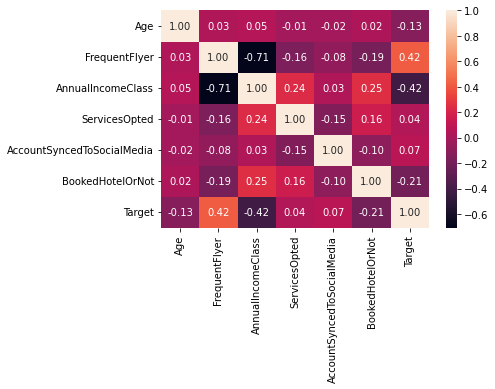

In [25]:
#showing correlation plot
sns.heatmap(df.corr(),annot=True, fmt='1.2f')

Looking at above plot we can see that there is a relation between customer churn and they are frequent flyer or not

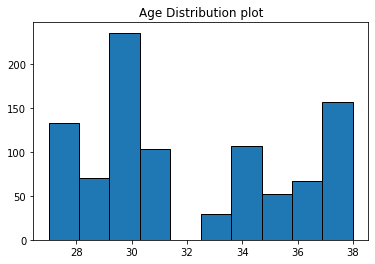

In [39]:
#Distribution of the Age of the customer
plt.hist(df['Age'], edgecolor='black')
plt.title('Age Distribution plot')
plt.show()

Looking at above graph we can see that most of the customers are between 28 to 30 years old

In [66]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
# for all categorical columns plot pie

for i in df :
    plot_pie(i)

#### Above visualizations shows based on churn and not churn customer comparison of all columns

1) Looking at 1st pie chart which is Age distribution in customer churn,highest customer churned age is 28 and for non churn it is age 30.Which means young customer churn more compare to customer's who are in there 30's.

2) customer who fly frequently are not churninh that much compare to customers who are not a frequent flyer.

3) High income customers churning at a rate of 41% which is highest on the other side middle income customers trying to stay loyal and not churning at the rate of 52%

4) In this pie chart customer are churning if they are opting 1 service as well as they are opting 5 so there is no relation with how many time they are geting same service or not.

5) 44%  of customers (in regards of churn )accounts are synced with some social media which means might be there decision to travel is related to information and ratings on social media

6) customers who are not booking a hotel are churning more compare to customers who booked a hotel.



## Data Preprocessing

In [71]:
#split data
X = df.drop('Target', axis = 1) # dropping Target column 
y = df['Target'] # taking target column as target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # spliting data into train and test

# printing shape of X_train,X_test,y_train,y_test
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(667, 6)
(667,)
(287, 6)
(287,)


## Modelling

In [75]:
# preparing a model

#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)]

In [76]:
#report models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 86.7596%
Log Loss: 4.57310626822616


DecisionTreeClassifier
****Results****
Accuracy: 84.6690%
Log Loss: 5.295182424181508


RandomForestClassifier
****Results****
Accuracy: 86.7596%
Log Loss: 4.573120198494979




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


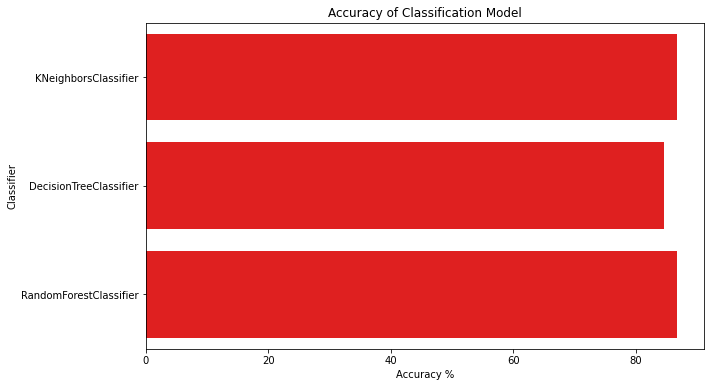

In [80]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "red")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes("muted")
plt.show()

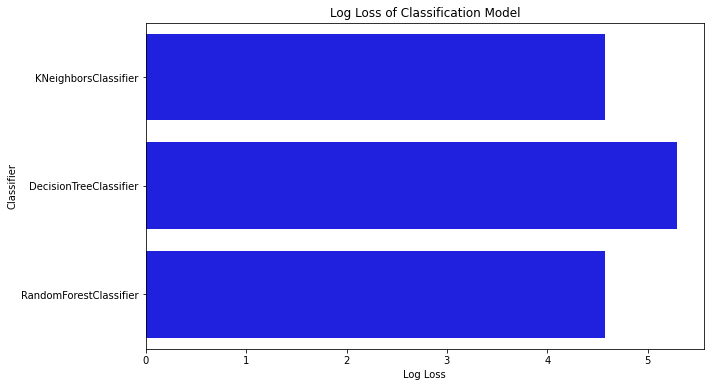

In [78]:
#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "blue")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()